<a href="https://colab.research.google.com/github/Bsyamsundar/Prostatexproject/blob/master/Prostatexproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.4 MB/s eta 0:00:00


In [3]:
!pip install scikit-image

In [4]:
!pip install pydicom matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.5 MB/s eta 0:00:00


In [5]:
import os
import pydicom
import matplotlib.pyplot as plt

In [6]:
def display_dicom_images(image_paths, num_images=2):
    for i in range(min(num_images, len(image_paths))):
        dicom_file = pydicom.dcmread(image_paths[i])
        image_data = dicom_file.pixel_array
        plt.figure(figsize=(5, 5))
        plt.imshow(image_data, cmap='gray')
        plt.title(f'Image {i+1}: {os.path.basename(image_paths[i])}')
        plt.axis('off')
        plt.show()


In [7]:
base_dir = "/content/drive/MyDrive/PROSTATEx/ProstateX-0201"

In [8]:
t2_image_paths = []

In [9]:
def collect_t2_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if 't2' in root.lower() and file.endswith('.dcm'):
                t2_image_paths.append(os.path.join(root, file))

In [10]:
collect_t2_images(base_dir)

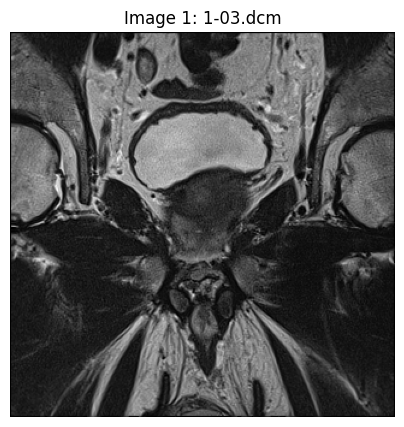

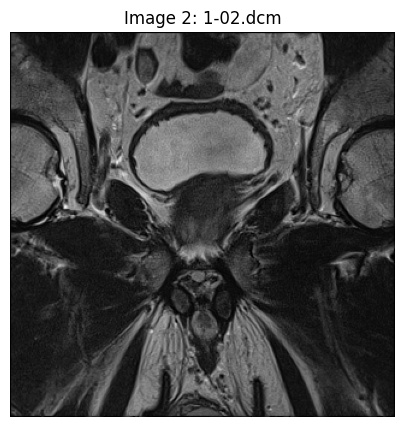

In [11]:
display_dicom_images(t2_image_paths)

In [12]:
import pandas as pd

findings_df = pd.read_csv('/content/drive/MyDrive/ProstateX-Findings-Train.csv')
images_df = pd.read_csv('/content/drive/MyDrive/ProstateX-Images-Train.csv')

In [13]:
print("Columns in Findings DataFrame:")
print(findings_df.columns)

print("\nColumns in Images DataFrame:")
print(images_df.columns)

Columns in Findings DataFrame:
Index(['ProxID', 'fid', 'pos', 'zone', 'ClinSig'], dtype='object')

Columns in Images DataFrame:
Index(['ProxID', 'Name', 'fid', 'pos', 'WorldMatrix', 'ijk', 'TopLevel',
       'SpacingBetweenSlices', 'VoxelSpacing', 'Dim', 'DCMSerDescr',
       'DCMSerNum'],
      dtype='object')


In [14]:
findings_df.head()

,ProxID,fid,pos,zone,ClinSig
0,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True
1,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False
2,ProstateX-0002,1,-27.0102 41.5467 -26.0469,PZ,True
3,ProstateX-0002,2,-2.058 38.6752 -34.6104,PZ,False
4,ProstateX-0003,1,22.1495 31.2717 -2.45933,TZ,False


In [15]:
images_df.head()

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7
1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8


In [16]:
base_dir = "/content/drive/MyDrive/PROSTATEx"

In [17]:
t2_image_paths = []

In [18]:
def collect_t2_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if 't2' in root.lower() and file.endswith('.dcm'):
                t2_image_paths.append(os.path.join(root, file))

In [19]:
collect_t2_images(base_dir)

In [20]:
len(t2_image_paths)

14523

In [21]:
t2_image_paths[-10:-1]

['/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-15.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-06.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-03.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-13.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-08.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-10.dcm',
 '/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MC

In [22]:
def filter_t2_images(images_df):
    t2_images_df = images_df[images_df['DCMSerDescr'].str.contains('t2', case=False, na=False)]
    return t2_images_df


In [23]:
t2_images_df = filter_t2_images(images_df)

In [24]:
t2_images_df.head()

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
5,ProstateX-0000,t2_tse_cor0,1,25.7457 31.8707 -38.511,"0.6,0,0,-57.5639,0,-0.190383,2.84497,29.839,0,...",139 166 12,1.0,3.0000,"0.6,0.6,3",320x320x15x1,t2_tse_cor,5
6,ProstateX-0000,t2_tse_sag0,1,25.7457 31.8707 -38.511,"0,0,-3.6,73.1629,0.5625,0,0,-67.018,0,-0.5625,...",176 169 13,1.0,3.6000,"0.5625,0.5625,3.6",320x320x19x1,t2_tse_sag,3
7,ProstateX-0000,t2_tse_tra0,1,25.7457 31.8707 -38.511,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0000,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
14,ProstateX-0001,t2_loc_sag0,1,-40.5367071921656 29.320722668457 -16.70766907...,"0,0,-10.5,-7.38253,1.5625,0,0,-167.046,0,-1.56...",126 145 3,1.0,10.5000,"1.5625,1.5625,10.5",256x256x3x1,t2_loc sag,3
15,ProstateX-0001,t2_localizer0,1,-40.5367071921656 29.320722668457 -16.70766907...,"0,0,-55.4762,17.2381,1.5625,0,0,-200.781,0,-1....",147 139 1,1.0,55.4762,"1.5625,1.5625,55.4762",256x256x13x1,t2_localizer,1


In [25]:
images_df = images_df.drop(columns=['Name'])

In [26]:
print("\nColumns in Images DataFrame:")
print(images_df.columns)


Columns in Images DataFrame:
Index(['ProxID', 'fid', 'pos', 'WorldMatrix', 'ijk', 'TopLevel',
       'SpacingBetweenSlices', 'VoxelSpacing', 'Dim', 'DCMSerDescr',
       'DCMSerNum'],
      dtype='object')


In [27]:
len(images_df)

3869

In [28]:
images_df = images_df.drop_duplicates()

In [29]:
len(images_df)

3187

In [30]:
t2_images_df = filter_t2_images(images_df)

In [31]:
t2_images_df.head()

,ProxID,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
5,ProstateX-0000,1,25.7457 31.8707 -38.511,"0.6,0,0,-57.5639,0,-0.190383,2.84497,29.839,0,...",139 166 12,1.0,3.0000,"0.6,0.6,3",320x320x15x1,t2_tse_cor,5
6,ProstateX-0000,1,25.7457 31.8707 -38.511,"0,0,-3.6,73.1629,0.5625,0,0,-67.018,0,-0.5625,...",176 169 13,1.0,3.6000,"0.5625,0.5625,3.6",320x320x19x1,t2_tse_sag,3
7,ProstateX-0000,1,25.7457 31.8707 -38.511,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0000,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
14,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,"0,0,-10.5,-7.38253,1.5625,0,0,-167.046,0,-1.56...",126 145 3,1.0,10.5000,"1.5625,1.5625,10.5",256x256x3x1,t2_loc sag,3
15,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,"0,0,-55.4762,17.2381,1.5625,0,0,-200.781,0,-1....",147 139 1,1.0,55.4762,"1.5625,1.5625,55.4762",256x256x13x1,t2_localizer,1


In [32]:
len(t2_images_df)

1411

In [33]:
merged_df = pd.merge(findings_df, t2_images_df, on=['ProxID', 'pos'])

In [34]:
merged_df.head()

,ProxID,fid_x,pos,zone,ClinSig,fid_y,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0.6,0,0,-57.5639,0,-0.190383,2.84497,29.839,0,...",139 166 12,1.0,3.0000,"0.6,0.6,3",320x320x15x1,t2_tse_cor,5
1,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0,0,-3.6,73.1629,0.5625,0,0,-67.018,0,-0.5625,...",176 169 13,1.0,3.6000,"0.5625,0.5625,3.6",320x320x19x1,t2_tse_sag,3
2,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0000,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
3,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False,1,"0,0,-10.5,-7.38253,1.5625,0,0,-167.046,0,-1.56...",126 145 3,1.0,10.5000,"1.5625,1.5625,10.5",256x256x3x1,t2_loc sag,3
4,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False,1,"0,0,-55.4762,17.2381,1.5625,0,0,-200.781,0,-1....",147 139 1,1.0,55.4762,"1.5625,1.5625,55.4762",256x256x13x1,t2_localizer,1


In [35]:
len(merged_df)

1411

In [37]:
len(t2_image_paths)

14523

In [38]:
def extract_prostatex_id(path):
    parts = path.split('/')
    for part in parts:
        if part.startswith('ProstateX-'):
            return part
    return None

In [39]:
def extract_dcm_series_num(path):
    parts = path.split('/')
    series_num_part = parts[-2]
    dcm_series_num = series_num_part.split('-')[-1].split('.')[0]
    return dcm_series_num

In [40]:
def extract_dcm_image_num(path):
    filename = path.split('/')[-1]
    dcm_image_num = filename.split('-')[-1].split('.')[0]
    return dcm_image_num

In [41]:
image_paths_df = pd.DataFrame(t2_image_paths, columns=['image_path'])

In [42]:
image_paths_df['ProxID'] = image_paths_df['image_path'].apply(extract_prostatex_id)
image_paths_df['DCMSerNum'] = image_paths_df['image_path'].apply(extract_dcm_image_num)

In [43]:
image_paths_df.head()

,image_path,ProxID,DCMSerNum
0,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,01
1,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,02
2,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,03
3,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,04
4,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,05


In [44]:
def extract_dcmserdescr(file_path):
    parts = file_path.split('/')
    for part in parts:
        if '-' in part and len(part.split('-')) >= 2:
            return part.split('-')[1]
    return None

In [45]:
image_paths_df['DCMSerDescr'] = image_paths_df['image_path'].apply(extract_dcmserdescr)

In [46]:
image_paths_df

,image_path,ProxID,DCMSerNum,DCMSerDescr
0,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,01,0203
1,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,02,0203
2,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,03,0203
3,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,04,0203
4,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,05,0203
...,...,...,...,...
14518,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,10,0000
14519,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,09,0000
14520,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,12,0000
14521,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,05,0000


In [47]:
image_paths_df.iloc[0,0]

'/content/drive/MyDrive/PROSTATEx/ProstateX-0203/09-05-2011-NA-MC prostaat kliniek detectie-mc MCPROSKL30-96714/9.000000-t2tsesag-13480/1-01.dcm'

In [48]:
def extract_dcmserdescr(path):
    parts = path.split('/')
    series_num_part = parts[-2]
    dcm_series_num = series_num_part.split('-')[1]
    return dcm_series_num

In [49]:
image_paths_df['DCMSerDescr'] = image_paths_df['image_path'].apply(extract_dcmserdescr)

In [50]:
image_paths_df.head()

,image_path,ProxID,DCMSerNum,DCMSerDescr
0,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,01,t2tsesag
1,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,02,t2tsesag
2,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,03,t2tsesag
3,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,04,t2tsesag
4,/content/drive/MyDrive/PROSTATEx/ProstateX-020...,ProstateX-0203,05,t2tsesag


In [51]:
len(image_paths_df)

14523

In [52]:
merged_df['DCMSerNum'] = merged_df['DCMSerNum'].astype(str)
image_paths_df['DCMSerNum'] = image_paths_df['DCMSerNum'].astype(str)

In [53]:
merged_df['DCMSerDescr'] = merged_df['DCMSerDescr'].str.lower()
image_paths_df['DCMSerDescr'] = image_paths_df['DCMSerDescr'].str.lower()

In [54]:
merged_df['DCMSerDescr'] = merged_df['DCMSerDescr'].str.lower().str.strip()
image_paths_df['DCMSerDescr'] = image_paths_df['DCMSerDescr'].str.lower().str.strip()

In [55]:
merged_df2 = pd.merge(merged_df, image_paths_df, on=['ProxID', 'DCMSerNum', 'DCMSerDescr'], how='left')

In [56]:
merged_df2.head()

,ProxID,fid_x,pos,zone,ClinSig,fid_y,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum,image_path
0,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0.6,0,0,-57.5639,0,-0.190383,2.84497,29.839,0,...",139 166 12,1.0,3.0000,"0.6,0.6,3",320x320x15x1,t2_tse_cor,5,NaN
1,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0,0,-3.6,73.1629,0.5625,0,0,-67.018,0,-0.5625,...",176 169 13,1.0,3.6000,"0.5625,0.5625,3.6",320x320x19x1,t2_tse_sag,3,NaN
2,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0000,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4,NaN
3,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False,1,"0,0,-10.5,-7.38253,1.5625,0,0,-167.046,0,-1.56...",126 145 3,1.0,10.5000,"1.5625,1.5625,10.5",256x256x3x1,t2_loc sag,3,NaN
4,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False,1,"0,0,-55.4762,17.2381,1.5625,0,0,-200.781,0,-1....",147 139 1,1.0,55.4762,"1.5625,1.5625,55.4762",256x256x13x1,t2_localizer,1,NaN


In [57]:
merged_df[merged_df['ProxID'] == 'ProstateX-0000']

,ProxID,fid_x,pos,zone,ClinSig,fid_y,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0.6,0,0,-57.5639,0,-0.190383,2.84497,29.839,0,...",139 166 12,1.0,3.0,"0.6,0.6,3",320x320x15x1,t2_tse_cor,5
1,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0,0,-3.6,73.1629,0.5625,0,0,-67.018,0,-0.5625,...",176 169 13,1.0,3.6,"0.5625,0.5625,3.6",320x320x19x1,t2_tse_sag,3
2,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4


In [58]:
image_paths_df[image_paths_df['ProxID'] == 'ProstateX-0000']

,image_path,ProxID,DCMSerNum,DCMSerDescr
14470,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,03,t2tsetra
14471,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,02,t2tsetra
14472,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,01,t2tsetra
14473,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,04,t2tsetra
14474,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,06,t2tsetra
14475,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,08,t2tsetra
14476,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,10,t2tsetra
14477,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,05,t2tsetra
14478,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,09,t2tsetra
14479,/content/drive/MyDrive/PROSTATEx/ProstateX-000...,ProstateX-0000,07,t2tsetra


In [59]:
merged_df['DCMSerNum'] = merged_df['DCMSerNum'].astype(int).astype(str).str.zfill(2)
image_paths_df['DCMSerNum'] = image_paths_df['DCMSerNum'].astype(str).str.zfill(2)

In [60]:
merged_df['DCMSerDescr'] = merged_df['DCMSerDescr'].str.replace('_', '').str.lower()
image_paths_df['DCMSerDescr'] = image_paths_df['DCMSerDescr'].str.replace('_', '').str.lower()

In [61]:
merged_df3 = pd.merge(merged_df, image_paths_df, on=['ProxID', 'DCMSerNum', 'DCMSerDescr'], how='left')

In [62]:
merged_df3.head()

,ProxID,fid_x,pos,zone,ClinSig,fid_y,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum,image_path
0,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0.6,0,0,-57.5639,0,-0.190383,2.84497,29.839,0,...",139 166 12,1.0,3.0000,"0.6,0.6,3",320x320x15x1,t2tsecor,05,/content/drive/MyDrive/PROSTATEx/ProstateX-000...
1,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0,0,-3.6,73.1629,0.5625,0,0,-67.018,0,-0.5625,...",176 169 13,1.0,3.6000,"0.5625,0.5625,3.6",320x320x19x1,t2tsesag,03,/content/drive/MyDrive/PROSTATEx/ProstateX-000...
2,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True,1,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0000,"0.5,0.5,3",384x384x19x1,t2tsetra,04,/content/drive/MyDrive/PROSTATEx/ProstateX-000...
3,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False,1,"0,0,-10.5,-7.38253,1.5625,0,0,-167.046,0,-1.56...",126 145 3,1.0,10.5000,"1.5625,1.5625,10.5",256x256x3x1,t2loc sag,03,/content/drive/MyDrive/PROSTATEx/ProstateX-000...
4,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False,1,"0,0,-55.4762,17.2381,1.5625,0,0,-200.781,0,-1....",147 139 1,1.0,55.4762,"1.5625,1.5625,55.4762",256x256x13x1,t2localizer,01,/content/drive/MyDrive/PROSTATEx/ProstateX-000...


In [63]:
merged_df3.iloc[0,14]

'/content/drive/MyDrive/PROSTATEx/ProstateX-0000/07-07-2011-NA-MR prostaat kanker detectie WDSmc MCAPRODETW-05711/5.000000-t2tsecor-03471/1-05.dcm'

In [64]:
def display_dicom_images(image_path):
    dicom_file = pydicom.dcmread(image_path)
    image_data = dicom_file.pixel_array
    plt.figure(figsize=(5, 5))
    plt.imshow(image_data, cmap='gray')
    plt.title(f'Image {1}: {os.path.basename(image_path)}')
    plt.axis('off')
    plt.show()

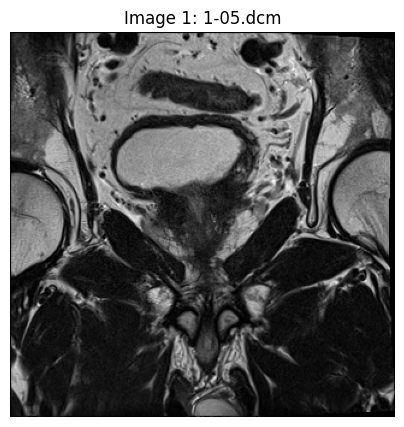

In [65]:
display_dicom_images(merged_df3.iloc[0,14])